In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
from numba import njit
import statistics
import time

In [61]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [62]:
display(visits)
visits.info()
print('------------------')
display(orders)
orders.info()
print('------------------')
display(costs)
costs.info()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
------------------


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
------------------


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [63]:
#@njit(fastmath=True)???
# Приводим к верному типу столбцы 'Start Ts' и 'End Ts' в visits
visits['Start Ts'] = visits['Start Ts'].apply(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
)

visits['End Ts'] = visits['End Ts'].apply(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
)

In [64]:
# Приводим к верному типу столбeц 'Buy Ts' в orders
orders['Buy Ts'] = orders['Buy Ts'].apply(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
)

In [65]:
# Приводим к верному типу столбeц 'dt' в costs
costs['dt'] = costs['dt'].apply(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [66]:
# объединяем датафремы visits и orders по столбцу 'Uid'
df = pd.merge(visits, orders, on='Uid')
display(df)
display(costs)

,Device,End Ts,Source Id,Start Ts,Uid,Buy Ts,Revenue
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:25:00,2.33
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09 20:25:00,2.33
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-04 12:46:00,2.44
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-10-28 00:01:00,1.53
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-10-28 19:16:00,1.53
...,...,...,...,...,...,...,...
761802,desktop,2017-12-04 12:50:00,3,2017-12-04 12:42:00,6752020629696526518,2017-12-04 12:46:00,4.15
761803,desktop,2017-11-20 23:44:00,4,2017-11-20 23:33:00,11750532881998794555,2017-11-20 23:43:00,3.67
761804,touch,2017-11-29 20:48:00,4,2017-11-29 20:27:00,11202626539189016002,2017-11-29 20:33:00,3.05
761805,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018-04-23 21:16:00,0.49


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


### Шаг 2. Рассчитайте метрики и постройте графики
__Посчитайте метрики трёх видов:__
* продуктовые
* метрики электронной коммерции
* маркетинговые               

Отобразите на графиках изменения каждой метрики во времени. Всякий раз старайтесь подобрать наиболее подходящий тип визуализации: в некоторых случаях может быть уместна тепловая карта когортного анализа.
После каждого пункта сформулируйте выводы.

### Продуктовые метрики

* Рассчитайте DAU, WAU и MAU. Вычислите средние значения этих метрик за весь период;
* Определите, сколько раз за день пользователи в среднем заходят на сайт;
* Исследуйте, сколько времени пользователи проводят на сайте. Узнайте продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, постройте график распределения. Изменение продолжительности сессий во времени изучать необязательно;
* Рассчитайте Retention Rate, применяя когортный анализ. Найдите средний Retention Rate на второй месяц «жизни» когорт.

In [67]:
#группируем по 'Uid', находим даты первой покупки для каджого Uid
first_order = df.groupby('Uid')['Buy Ts'].min()

# переименовываем название столбца 'Buy Ts' из Series в 'first_order_date'
first_order.name = 'first_order_date'

#присоединям Series к df
df = df.join(first_order, on='Uid')

In [68]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761807 entries, 0 to 761806
Data columns (total 8 columns):
Device              761807 non-null object
End Ts              761807 non-null datetime64[ns]
Source Id           761807 non-null int64
Start Ts            761807 non-null datetime64[ns]
Uid                 761807 non-null uint64
Buy Ts              761807 non-null datetime64[ns]
Revenue             761807 non-null float64
first_order_date    761807 non-null datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(1), uint64(1)
memory usage: 52.3+ MB
None


In [69]:
# создаем столбцы с месяцем первого заказа
df['order_month'] = df['Buy Ts'].astype('datetime64[M]')
df['first_order_month'] = df['first_order_date'].astype('datetime64[M]')
display(df)

,Device,End Ts,Source Id,Start Ts,Uid,Buy Ts,Revenue,first_order_date,order_month,first_order_month
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00,2017-09-01,2017-09-01
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00,2017-10-01,2017-09-01
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00,2017-10-01,2017-09-01
...,...,...,...,...,...,...,...,...,...,...
761802,desktop,2017-12-04 12:50:00,3,2017-12-04 12:42:00,6752020629696526518,2017-12-04 12:46:00,4.15,2017-12-04 12:46:00,2017-12-01,2017-12-01
761803,desktop,2017-11-20 23:44:00,4,2017-11-20 23:33:00,11750532881998794555,2017-11-20 23:43:00,3.67,2017-11-20 23:43:00,2017-11-01,2017-11-01
761804,touch,2017-11-29 20:48:00,4,2017-11-29 20:27:00,11202626539189016002,2017-11-29 20:33:00,3.05,2017-11-29 20:33:00,2017-11-01,2017-11-01
761805,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018-04-23 21:16:00,0.49,2018-04-23 21:16:00,2018-04-01,2018-04-01


In [70]:
# группируем по 'first_order_month'- это когорты, подсчитываем уникальных пользователей и суммарную выручку
cohort_grouped = df.groupby('first_order_month').agg(
    {'Uid' : 'nunique', 'Revenue' : 'sum'})
print(cohort_grouped)

                    Uid       Revenue
first_order_month                    
2017-06-01         2023  2.717652e+06
2017-07-01         1923  5.155539e+05
2017-08-01         1370  3.757915e+05
2017-09-01         2581  1.680143e+06
2017-10-01         4340  1.994744e+05
2017-11-01         4081  3.892719e+05
2017-12-01         4383  2.925601e+05
2018-01-01         3373  1.813623e+05
2018-02-01         3651  8.937845e+04
2018-03-01         3533  4.011142e+05
2018-04-01         2276  8.430222e+04
2018-05-01         2988  3.560077e+04
2018-06-01            1  3.420000e+00


In [71]:
# создаем столбцы с годом, месяцем, неделей, датой(днем).
df['session_year'] = df['Start Ts'].dt.year
df['session_month'] = df['Start Ts'].dt.month
df['session_week'] = df['Start Ts'].dt.week
df['session_date'] = df['Start Ts'].dt.date
display(df)

,Device,End Ts,Source Id,Start Ts,Uid,Buy Ts,Revenue,first_order_date,order_month,first_order_month,session_year,session_month,session_week,session_date
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01,2018,5,20,2018-05-20
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01,2018,3,10,2018-03-09
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00,2017-09-01,2017-09-01,2017,9,35,2017-09-03
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00,2017-10-01,2017-09-01,2017,9,35,2017-09-03
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00,2017-10-01,2017-09-01,2017,9,35,2017-09-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761802,desktop,2017-12-04 12:50:00,3,2017-12-04 12:42:00,6752020629696526518,2017-12-04 12:46:00,4.15,2017-12-04 12:46:00,2017-12-01,2017-12-01,2017,12,49,2017-12-04
761803,desktop,2017-11-20 23:44:00,4,2017-11-20 23:33:00,11750532881998794555,2017-11-20 23:43:00,3.67,2017-11-20 23:43:00,2017-11-01,2017-11-01,2017,11,47,2017-11-20
761804,touch,2017-11-29 20:48:00,4,2017-11-29 20:27:00,11202626539189016002,2017-11-29 20:33:00,3.05,2017-11-29 20:33:00,2017-11-01,2017-11-01,2017,11,48,2017-11-29
761805,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018-04-23 21:16:00,0.49,2018-04-23 21:16:00,2018-04-01,2018-04-01,2018,4,17,2018-04-23


In [72]:
# Группируем по дню и месяцу, подсчитываем кол-во уникальных Uid и берем среднее.
# Подсчитываем DAU, WAU, MAU
DAU = df.groupby('session_date').agg({'Uid' : 'nunique'}).mean()
MAU = df.groupby(['session_year', 'session_month']).agg({'Uid' : 'nunique'}).mean()
WAU = df.groupby('session_week').agg({'Uid' : 'nunique'}).mean()


print('Ежедневно количество людей заходящих на сайт:{}'.format(int(DAU)))
print('Ежемесячно количество людей заходящих на сайт:{}'.format(int(MAU)))
print('Еженедельно количество людей заходящих на сайт:{}'.format(int(WAU)))

Ежедневно количество людей заходящих на сайт:225
Ежемесячно количество людей заходящих на сайт:4686
Еженедельно количество людей заходящих на сайт:1299


In [73]:
#Определяем, сколько раз за день пользователи в среднем заходят на сайт
df['session_time'] = (df['End Ts'] - df['Start Ts']).dt.seconds
#display(df)
n_user_mean = (df.groupby('Uid')['session_time'].count()).mean()
print('За день пользователи в среднем заходят на сайт {} раз'.format(round(n_user_mean)))

За день пользователи в среднем заходят на сайт 21 раз


In [74]:
# Рассчитаем сколько в среднем пользователи проводят на сайте
print('В среднем пользователи проводят на сайте {} секунд'.format(int(df['session_time'].mean())))

В среднем пользователи проводят на сайте 1260 секунд


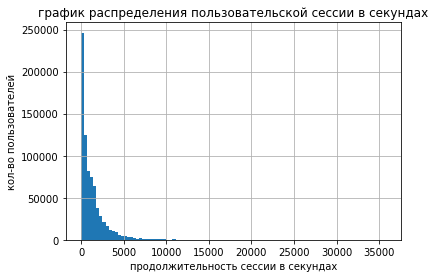

In [75]:
df['session_time'].hist(bins=100)
plt.xlabel('продолжительность сессии в секундах')
plt.ylabel('кол-во пользователей')
plt.title('график распределения пользовательской сессии в секундах');

In [76]:
print('Мода продолжительности пользовательской сессии равна {} секундам.'.format(statistics.mode(df['session_time'])))

Мода продолжительности пользовательской сессии равна 60 секундам.


In [83]:
# Рассчитайте Retention Rate, применяя когортный анализ. 
# Найдите средний Retention Rate на второй месяц «жизни» когорт.
df['cohort_lifetime'] = df['Buy Ts'] - df['first_order_date']
df['cohort_lifetime'] = df['cohort_lifetime'] / np.timedelta64(1,'M')
df['cohort_lifetime'] = df['cohort_lifetime'].astype('int')
display(df)

,Device,End Ts,Source Id,Start Ts,Uid,Buy Ts,Revenue,first_order_date,order_month,first_order_month,session_year,session_month,session_week,session_date,session_time,cohort_lifetime
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01,2018,5,20,2018-05-20,1440,0
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01,2018,3,10,2018-03-09,1680,0
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00,2017-09-01,2017-09-01,2017,9,35,2017-09-03,60,0
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00,2017-10-01,2017-09-01,2017,9,35,2017-09-03,60,1
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00,2017-10-01,2017-09-01,2017,9,35,2017-09-03,60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761802,desktop,2017-12-04 12:50:00,3,2017-12-04 12:42:00,6752020629696526518,2017-12-04 12:46:00,4.15,2017-12-04 12:46:00,2017-12-01,2017-12-01,2017,12,49,2017-12-04,480,0
761803,desktop,2017-11-20 23:44:00,4,2017-11-20 23:33:00,11750532881998794555,2017-11-20 23:43:00,3.67,2017-11-20 23:43:00,2017-11-01,2017-11-01,2017,11,47,2017-11-20,660,0
761804,touch,2017-11-29 20:48:00,4,2017-11-29 20:27:00,11202626539189016002,2017-11-29 20:33:00,3.05,2017-11-29 20:33:00,2017-11-01,2017-11-01,2017,11,48,2017-11-29,1260,0
761805,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018-04-23 21:16:00,0.49,2018-04-23 21:16:00,2018-04-01,2018-04-01,2018,4,17,2018-04-23,480,0


### Метрики электронной коммерции

* Исследуйте, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. Изучать изменение этой метрики во времени необязательно;
* Применяя когортный анализ или другой метод, рассчитайте среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. Изучать изменение этой метрики во времени необязательно;
* Рассчитайте средний чек;
* Выясните, как меняется во времени LTV на покупателя по когортам. Помните, что LTV — накопительная метрика. Рассчитайте средний LTV по когортам за 6 месяцев; в расчёт включайте когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%.

### Маркетинговые метрики

Посчитайте и отобразите на графиках, как маркетинговые метрики различаются по рекламным источникам.
Один и тот же пользователь мог заходить на сайт из нескольких источников, поэтому важно определить «главный» источник для каждого и учитывать это в расчётах. Например, главным может стать первый источник перехода.
* Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам;
* Рассчитайте средний CAC на одного покупателя для всего проекта и для каждого источника трафика;
* Рассчитайте ROMI по когортам в разрезе источников. Сравните окупаемость за одинаковые периоды жизни когорт. Обратите внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV.